In [ ]:
import sys
import yaml

from typing import Dict, List, Optional, Tuple, Union, Any

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../env_vars.yml", "r") as file:
    config = yaml.safe_load(file)

# custom imports
sys.path.append(config["project_directory"])
from src import eda_utils

# ignore warnings
import warnings

warnings.filterwarnings("ignore")

# load data

In [ ]:
# load data with available packaging categories
df_ml = pd.read_csv(f"{config['data_directory']}/output/df_ml.csv", sep="\t")
df_ml["packaging_category"] = df_ml["packaging_category"].astype("object")
df_ml["group"] = "assigned"

In [4]:
df_ml.head()

,material_number,material_number_text,brand,product_area,core_segment,component,component_text,manufactoring_location,characteristic_value,material_weight,packaging_code,packaging_category,group
0,75116293,Counter Display,BOT,PA5,Metal Grinding,6035765C21,Corrugated carton,Distribution Center,CORRUGATED,85.00,PCode_304109,Countertop display,assigned
1,75116293,Counter Display,BOT,PA5,Metal Grinding,6035940565,Label SB,Distribution Center,WOOD FREE,0.54,PCode_440854,Countertop display,assigned
2,75116293,Counter Display,BOT,PA5,Metal Grinding,6035822768,Tight -Pack label RB - 1ER,Distribution Center,MCB/GT2,22.90,PCode_834649,Countertop display,assigned
3,75116293,Counter Display,BOT,PA5,Metal Grinding,6035822768,Tight -Pack label RB - 1ER,Distribution Center,MCB/GT2,22.90,PCode_834649,Countertop display,assigned
4,75116293,Counter Display,BOT,PA5,Metal Grinding,6035765P54,Corrugated carton,Distribution Center,CORRUGATED,85.00,PCode_304109,Countertop display,assigned


In [5]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82977 entries, 0 to 82976
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   material_number         82977 non-null  int64  
 1   material_number_text    82977 non-null  object 
 2   brand                   82977 non-null  object 
 3   product_area            82977 non-null  object 
 4   core_segment            82977 non-null  object 
 5   component               82977 non-null  object 
 6   component_text          82977 non-null  object 
 7   manufactoring_location  82977 non-null  object 
 8   characteristic_value    82977 non-null  object 
 9   material_weight         75913 non-null  float64
 10  packaging_code          82977 non-null  object 
 11  packaging_category      82977 non-null  object 
 12  group                   82977 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 8.2+ MB


In [ ]:
# load data with unavailable packaging categories
df_inf = pd.read_csv(f"{config['data_directory']}/output/df_inf.csv", sep="\t")
df_inf["packaging_category"] = df_inf["packaging_category"].astype("object")
df_inf["group"] = "unassigned"

In [7]:
df_inf.head()

,material_number,material_number_text,brand,product_area,core_segment,component,component_text,manufactoring_location,characteristic_value,material_weight,packaging_code,packaging_category,group
0,77095609,GPO MOLTONS.175,BOT,PA4,Coated Abr/Polishing,6035738186,Corrugated carton,Buyout(all entities),WELLKARTON 332,NaN,PCode_304109,Unassigned,unassigned
1,77095609,GPO MOLTONS.175,BOT,PA4,Coated Abr/Polishing,6035940770,Adhesive Label,Buyout(all entities),WOOD FREE,0.35,PCode_451168,Unassigned,unassigned
2,77095609,GPO MOLTONS.175,BOT,PA4,Coated Abr/Polishing,6035910344,Label MP,Buyout(all entities),PE,0.27,PCode_440854,Unassigned,unassigned
3,53683705,9913364,VMT,PA5,Metal Drill Bits,1609471012,Insert P63152B 12X6 CB,Lct (Lincolnton),PAPER/CARDBOARD,NaN,PCode_574213,Unassigned,unassigned
4,59950025,565,PRL,PA5,Metal Drill Bits,1609443831,Corrugated carton #565,Buyout(all entities),CORRUGATED,104.44,PCode_304109,Unassigned,unassigned


In [8]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   material_number         7058 non-null   int64  
 1   material_number_text    7058 non-null   object 
 2   brand                   7058 non-null   object 
 3   product_area            7058 non-null   object 
 4   core_segment            7058 non-null   object 
 5   component               7058 non-null   object 
 6   component_text          7058 non-null   object 
 7   manufactoring_location  7058 non-null   object 
 8   characteristic_value    7058 non-null   object 
 9   material_weight         6632 non-null   float64
 10  packaging_code          7058 non-null   object 
 11  packaging_category      7058 non-null   object 
 12  group                   7058 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 717.0+ KB


In [ ]:
# concatenate data
frames = [df_ml, df_inf]
df_full = pd.concat(frames).reset_index(drop=True)

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90035 entries, 0 to 90034
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   material_number         90035 non-null  int64  
 1   material_number_text    90035 non-null  object 
 2   brand                   90035 non-null  object 
 3   product_area            90035 non-null  object 
 4   core_segment            90035 non-null  object 
 5   component               90035 non-null  object 
 6   component_text          90035 non-null  object 
 7   manufactoring_location  90035 non-null  object 
 8   characteristic_value    90035 non-null  object 
 9   material_weight         82545 non-null  float64
 10  packaging_code          90035 non-null  object 
 11  packaging_category      90035 non-null  object 
 12  group                   90035 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 8.9+ MB


In [ ]:
df_full["group"].value_counts()

group
assigned      82977
unassigned     7058
Name: count, dtype: int64

In [ ]:
# Calculate summary statistics for each column in the DataFrame
summary_df = eda_utils.df_column_summary(df_full)
display(summary_df)

,col_name,col_dtype,null_present,n_non_nulls,n_nulls,n_nulls_pct,n_unique_values,unique_values,unique_values_normalized
0,material_number,int64,False,90035,0,0.00,27505,"{88241222: 20, 40754196: 20, 40366794: 18, 830...","{88241222: 0.000222135836063753, 40754196: 0.0..."
1,material_number_text,object,False,90035,0,0.00,18477,"{'SDS-plus': 1110, 'HAMMERBOHRER': 850, 'NO DE...","{'SDS-plus': 0.01232853890153829, 'HAMMERBOHRE..."
2,brand,object,False,90035,0,0.00,13,"{'BOT': 48447, 'PRL': 21319, 'DIA': 10828, 'PR...","{'BOT': 0.538090742489032, 'PRL': 0.2367856944..."
3,product_area,object,False,90035,0,0.00,5,"{'PA1': 30629, 'PA2': 29232, 'PA5': 15910, 'PA...","{'PA1': 0.3401899261398345, 'PA2': 0.324673737..."
4,core_segment,object,False,90035,0,0.00,23,"{'HammerDrillingsmall': 16044, 'Coated Abr/Pol...","{'HammerDrillingsmall': 0.17819736769034264, '..."
5,component,object,False,90035,0,0.00,17834,"{'6035940565': 4819, '6801017003': 3625, 'F00Y...","{'6035940565': 0.05352362969956128, '680101700..."
6,component_text,object,False,90035,0,0.00,5214,"{'Label': 13012, 'Corrugated carton': 6611, 'L...","{'Label': 0.14452157494307769, 'Corrugated car..."
7,manufactoring_location,object,False,90035,0,0.00,24,"{'Krk (ECF Krsko)': 24845, 'NiP (St. Niklaus)'...","{'Krk (ECF Krsko)': 0.27594824235019716, 'NiP ..."
8,characteristic_value,object,False,90035,0,0.00,523,"{'CORRUGATED': 17910, 'WOOD FREE': 9234, 'PAPE...","{'CORRUGATED': 0.1989226411950908, 'WOOD FREE'..."
9,material_weight,float64,True,82545,7490,8.32,1571,"{2.0: 6124, 0.54: 4825, 1.0: 3299, 5.0: 1672, ...","{2.0: 0.0741898358471137, 0.54: 0.058452965049..."


# Numerical feature analysis

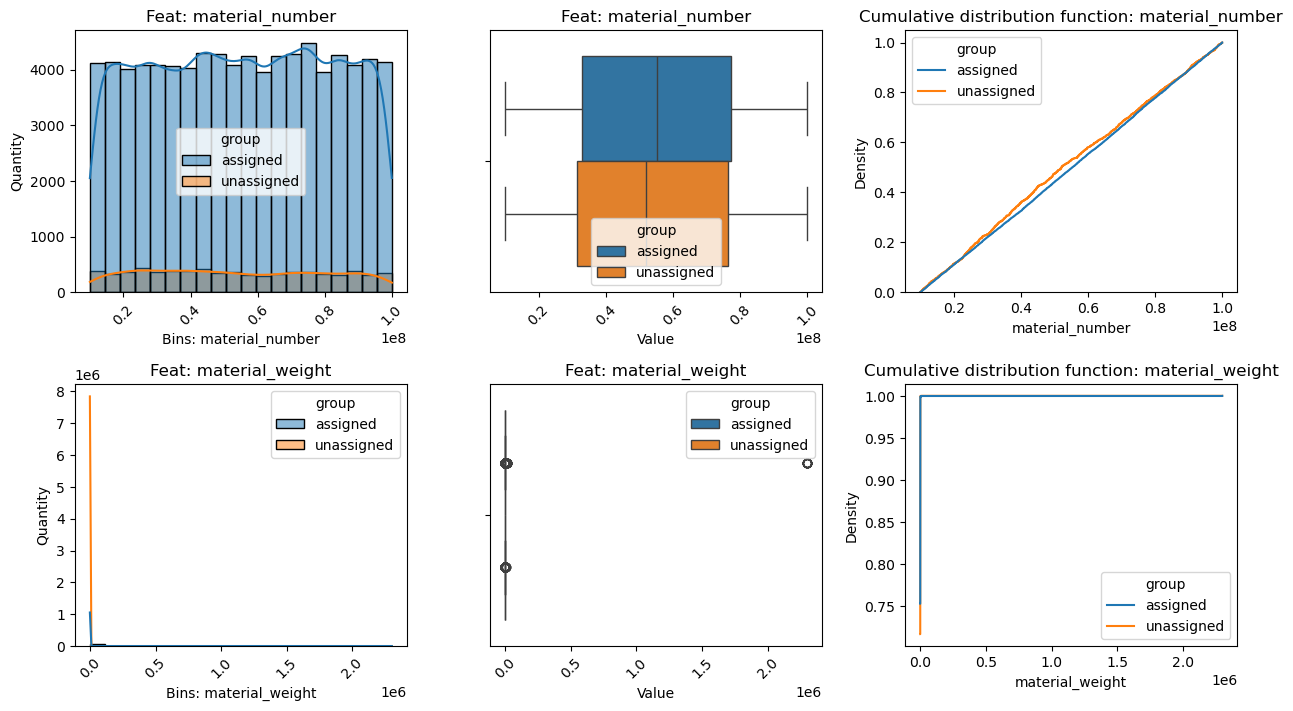

In [ ]:
df_plot = df_full[list(df_full.select_dtypes(include=np.number).columns) + ["group"]]
eda_utils.plot_distribution_numeric_features(
    df=df_plot, hue="group", figsize_width=15, figsize_hight_factor=1
)

In [ ]:
df_full["material_weight"].quantile([0.1, 0.5, 0.9])

0.1      0.31
0.5      5.00
0.9    238.74
Name: material_weight, dtype: float64

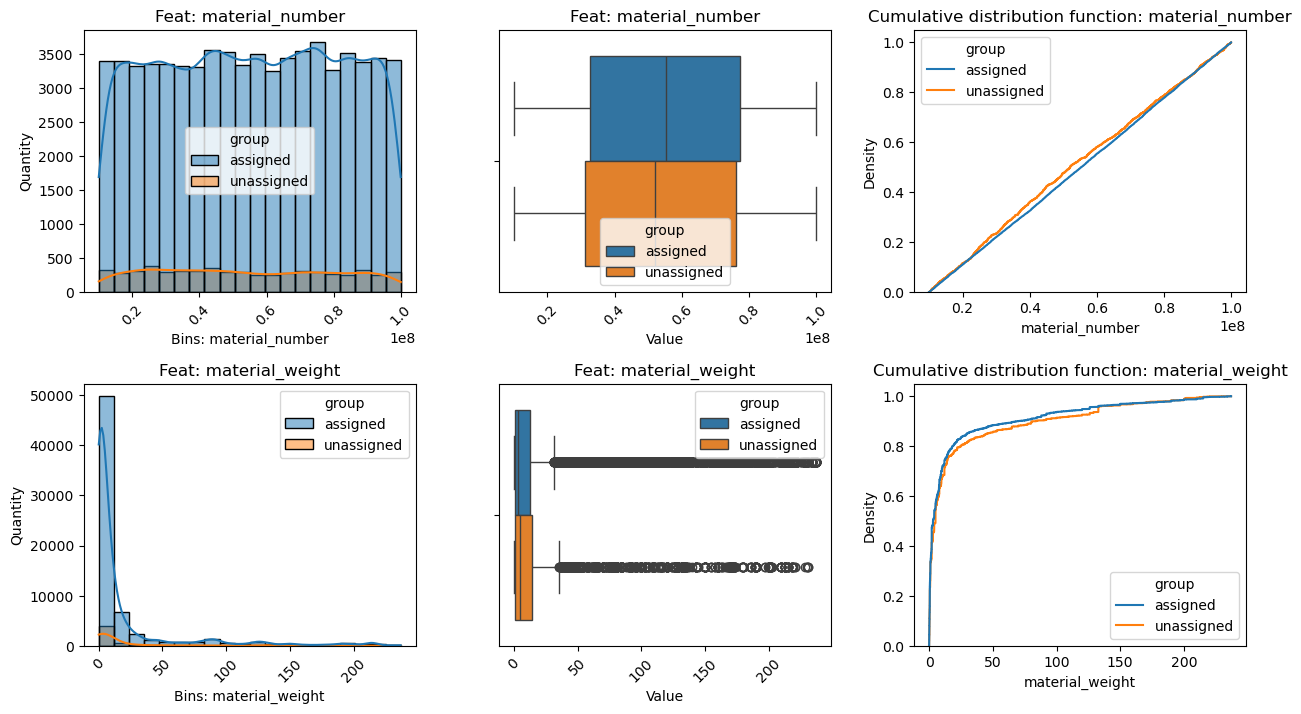

In [ ]:
df_plot = df_full[list(df_full.select_dtypes(include=np.number).columns) + ["group"]].loc[
    df_full.material_weight <= 238
]

eda_utils.plot_distribution_numeric_features(
    df=df_plot, hue="group", figsize_width=15, figsize_hight_factor=1
)

In [ ]:
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp


def compare_distributions(df) -> None:
    """
    The Mann-Whitney U-Test can be used to test whether there is a difference between two samples (groups), and the data need not be normally distributed.
        H0: The difference between the medians is significant.
    Two-sample Kolmogorov-Smirnov test for goodness of fit. The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.
        H0: The two distributions are identical.
    """
    cols_numeric_feat = df.select_dtypes(include="number").columns.tolist()
    # plot distribution of all indicators
    for col in cols_numeric_feat:
        print(f"Feature - '{col}':")
        # The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y.
        # It is often used as a test of difference in location between distributions.
        stat, p_value = mannwhitneyu(
            df[col].loc[df["group"] == "assigned"].dropna(),
            df[col].loc[df["group"] == "unassigned"].dropna(),
        )
        print(f"    Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

        # This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.
        stat, p_value = ks_2samp(
            df[col].loc[df["group"] == "assigned"].dropna(),
            df[col].loc[df["group"] == "unassigned"].dropna(),
        )
        print(f"    Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value:.4f}")


# We choose a confidence level of 95%; that is, we will reject the null hypothesis in favor of the alternative if the p-value is less than 0.05.
# If the p-values are less than a significance level (0.05) then reject the null hypothesis.
compare_distributions(df_full)

Feature - 'material_number':
    Mann–Whitney U Test: statistic=301499171.0000, p-value=0.0000
    Kolmogorov-Smirnov Test: statistic=0.0385, p-value=0.0000
Feature - 'material_weight':
    Mann–Whitney U Test: statistic=239938087.5000, p-value=0.0000
    Kolmogorov-Smirnov Test: statistic=0.0617, p-value=0.0000


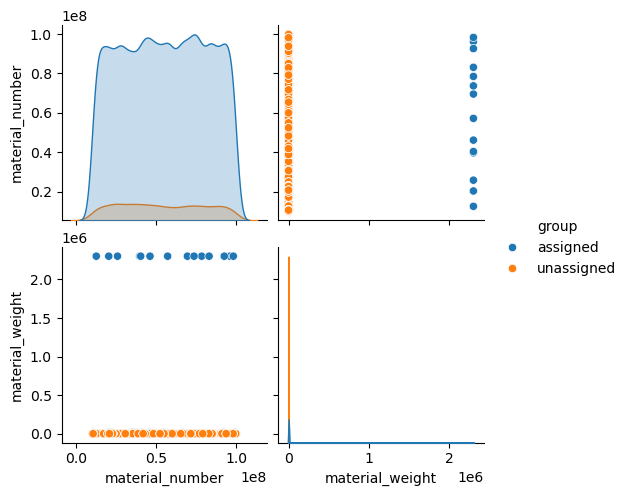

In [ ]:
# Explore relationships between multiple variables simultaneously.
sns.pairplot(
    df_full[list(df_full.select_dtypes(include=np.number).columns) + ["group"]], hue="group"
)

In [18]:
import math

# Distribution analysis - individual variables

In [19]:
df_full.columns

Index(['material_number', 'material_number_text', 'brand', 'product_area',
       'core_segment', 'component', 'component_text', 'manufactoring_location',
       'characteristic_value', 'material_weight', 'packaging_code',
       'packaging_category', 'group'],
      dtype='object')

# Categorical feature analysis

In [ ]:
# list of categorical column names
cat_cols = df_full.select_dtypes(include="object").columns.tolist()
cat_cols

['material_number_text',
 'brand',
 'product_area',
 'core_segment',
 'component',
 'component_text',
 'manufactoring_location',
 'characteristic_value',
 'packaging_code',
 'packaging_category',
 'group']

In [ ]:
# loop over the column names and get value_counts() for the top 10 to each column
for index, row in summary_df.select_dtypes(include="object").iterrows():
    print(f"{row['col_name']}:\n    {row['unique_values']}")

material_number:
    {88241222: 20, 40754196: 20, 40366794: 18, 83077454: 18, 20393456: 18, 73676523: 18, 12601558: 18, 92566819: 18, 54308250: 16, 87154861: 15}
material_number_text:
    {'SDS-plus': 1110, 'HAMMERBOHRER': 850, 'NO DESCRIPTION': 819, 'SPIRALBOHRER': 809, 'STEINBOHRER': 539, 'SCHLEIFBLATTSAT': 427, 'NUT-BOHRER-SDS': 325, 'DIAMANTTRENNSCH': 312, 'FRAESBOHRER': 250, 'Hammer drill bit': 240}
brand:
    {'BOT': 48447, 'PRL': 21319, 'DIA': 10828, 'PRB': 3538, 'WER': 3513, 'SIA': 1162, 'AVT': 759, '-': 179, 'VMT': 168, 'SKL': 72}
product_area:
    {'PA1': 30629, 'PA2': 29232, 'PA5': 15910, 'PA4': 10413, 'PA3': 3851}
core_segment:
    {'HammerDrillingsmall': 16044, 'Coated Abr/Polishing': 10160, 'Recip Saw Blades': 8574, 'Jig Saw Blades': 8265, 'Starlock': 7096, 'Metal Drill Bits': 5608, 'Hammerdr.large/other': 5600, 'Holesaws': 5297, 'Impact+Rot.Drill Bit': 5230, 'Screw Driving & Sets': 3942}
component:
    {'6035940565': 4819, '6801017003': 3625, 'F00Y203268': 1133, '6035911

In [ ]:
cat_cols = df_full.select_dtypes(include="object").columns.tolist()
cat_cols

['material_number_text',
 'brand',
 'product_area',
 'core_segment',
 'component',
 'component_text',
 'manufactoring_location',
 'characteristic_value',
 'packaging_code',
 'packaging_category',
 'group']

In [ ]:
# Calculate summary statistics for each column in the DataFrame
summary_df = eda_utils.df_column_summary(df_full.loc[df_full["group"] == "assigned"])
display(summary_df[["col_name", "n_unique_values", "unique_values_normalized"]])

,col_name,n_unique_values,unique_values_normalized
0,material_number,25117,"{40754196: 0.000241030647046772, 88241222: 0.0..."
1,material_number_text,16780,"{'SDS-plus': 0.013353097846391168, 'HAMMERBOHR..."
2,brand,10,"{'BOT': 0.565277124986442, 'PRL': 0.2336912638..."
3,product_area,5,"{'PA1': 0.33256203526278366, 'PA2': 0.32995890..."
4,core_segment,22,"{'HammerDrillingsmall': 0.17295154078841124, '..."
5,component,16551,"{'6035940565': 0.05318341227087024, '680101700..."
6,component_text,4839,"{'Label': 0.14442556371042578, 'Corrugated car..."
7,manufactoring_location,23,"{'Krk (ECF Krsko)': 0.286766212323897, 'NiP (S..."
8,characteristic_value,510,"{'CORRUGATED': 0.1997541487400123, 'WOOD FREE'..."
9,material_weight,1489,"{2.0: 0.07587633211702871, 0.54: 0.05819820057..."


In [ ]:
# Calculate summary statistics for each column in the DataFrame
summary_df = eda_utils.df_column_summary(df_full.loc[df_full["group"] == "unassigned"])
display(summary_df[["col_name", "n_unique_values", "unique_values_normalized"]])

,col_name,n_unique_values,unique_values_normalized
0,material_number,2388,"{97922267: 0.001700198356474922, 37504889: 0.0..."
1,material_number_text,1973,"{'NO DESCRIPTION': 0.028761688863700764, 'PAR-..."
2,brand,13,"{'DIA': 0.38566166052706147, 'PRL': 0.27316520..."
3,product_area,5,"{'PA1': 0.4298668177954095, 'PA2': 0.262538962..."
4,core_segment,22,"{'HammerDrillingsmall': 0.23986965145933692, '..."
5,component,1907,"{'6035940565': 0.05752337772740153, '261004209..."
6,component_text,718,"{'Label': 0.14565032587135165, 'Corrugated car..."
7,manufactoring_location,10,"{'Lct (Lincolnton)': 0.27713233210541227, 'Buy..."
8,characteristic_value,156,"{'CORRUGATED': 0.18914706715783508, 'PAPER': 0..."
9,material_weight,551,"{1.0: 0.06182147165259349, 0.54: 0.06136911942..."


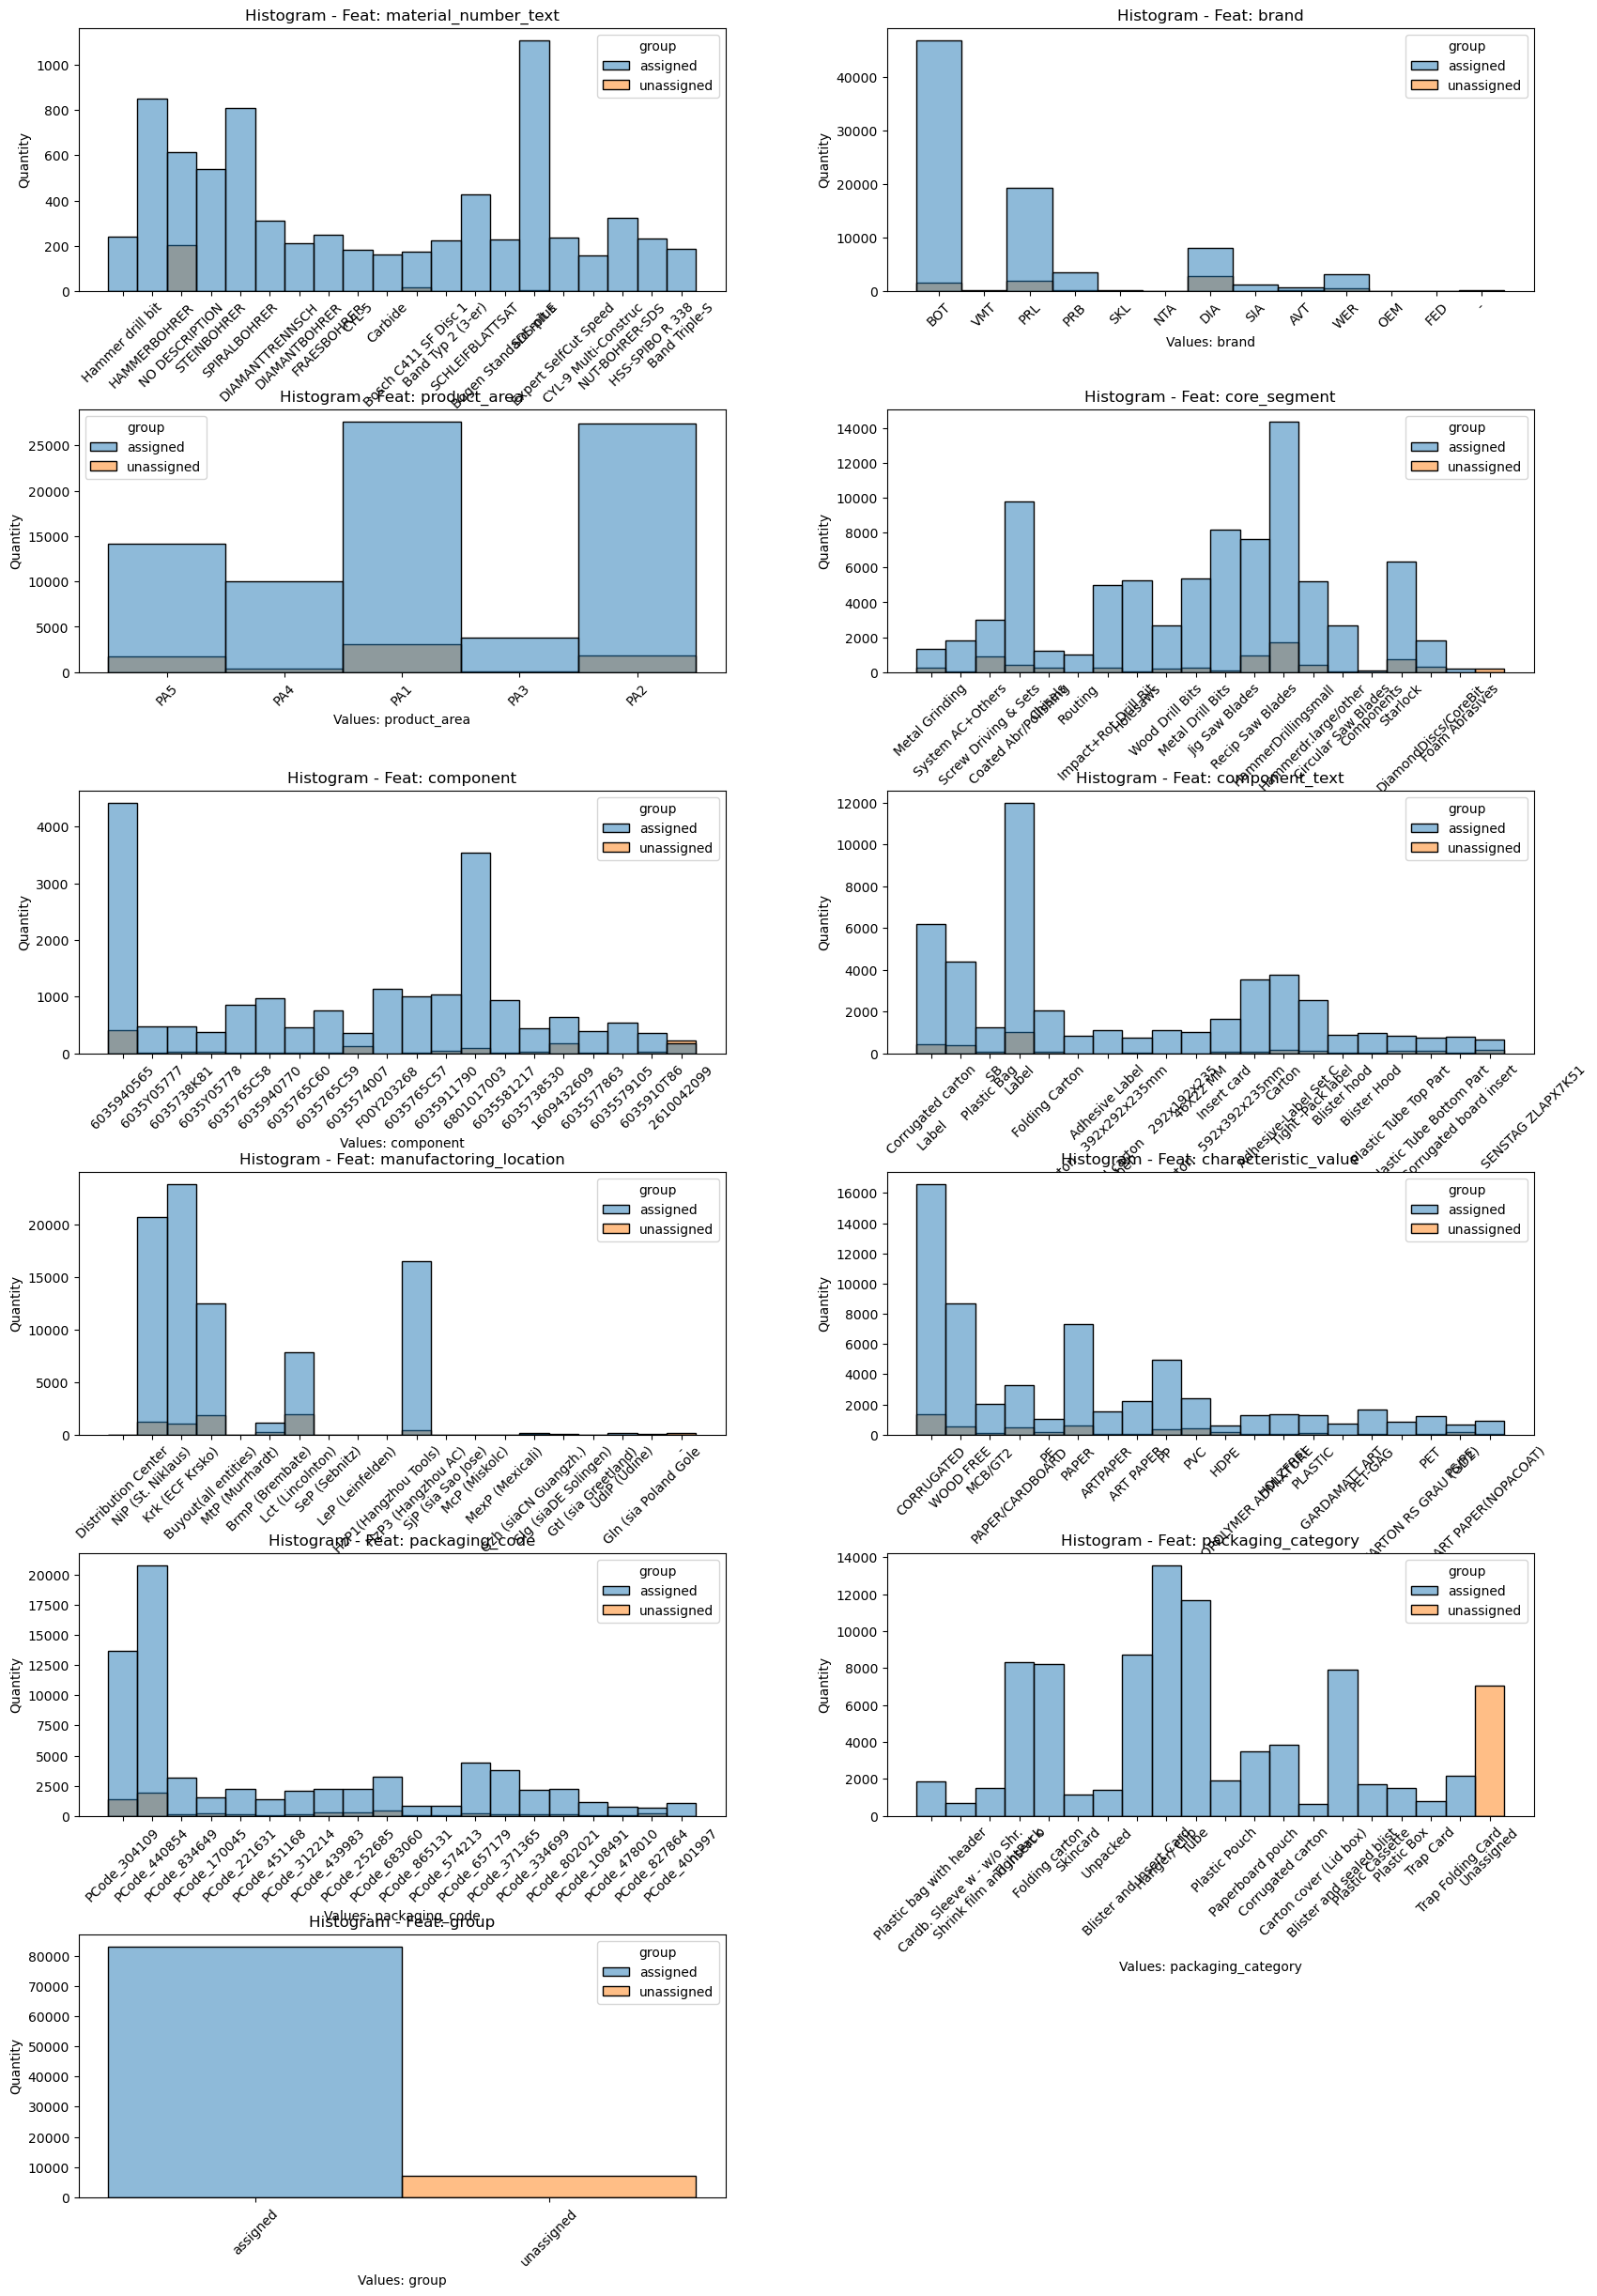

In [ ]:
def plot_distribution_categorical_features(
    df: pd.DataFrame = None,
    hue: Optional[str] = None,
    limit_most_frequent: bool = False,
    limit_most_frequent_threshold: int = None,
) -> None:
    # plot categorical data
    cat_cols = df.select_dtypes(include="object").columns.tolist()
    # Plot all features individually
    n_subplots = len(cat_cols)
    fig = plt.figure(figsize=(20, math.ceil(n_subplots / 4) * 10))
    fig.subplots_adjust(hspace=0.45, wspace=0.25)
    for idx, col in enumerate(df.columns):
        idx += 1
        ax = fig.add_subplot(math.ceil(n_subplots / 2), 2, idx)
        if limit_most_frequent is True:
            # Get the top n most frequent values
            most_frequent_values = (
                df[col].value_counts().nlargest(limit_most_frequent_threshold).index
            )
            _filtered_df = df[df[col].isin(most_frequent_values)]
            sns.histplot(data=_filtered_df, x=col, hue=hue)
        else:
            sns.histplot(data=df, x=col, hue=hue)
        # Edit graph
        ax.set_title(f"Histogram - Feat: {col}")
        ax.set_xlabel(f"Values: {col}")
        ax.set_ylabel("Quantity")
        ax.tick_params(axis="x", rotation=45)


plot_distribution_categorical_features(
    df_full.select_dtypes(include="object"),
    hue="group",
    limit_most_frequent=True,
    limit_most_frequent_threshold=20,
)

# Classification analysis

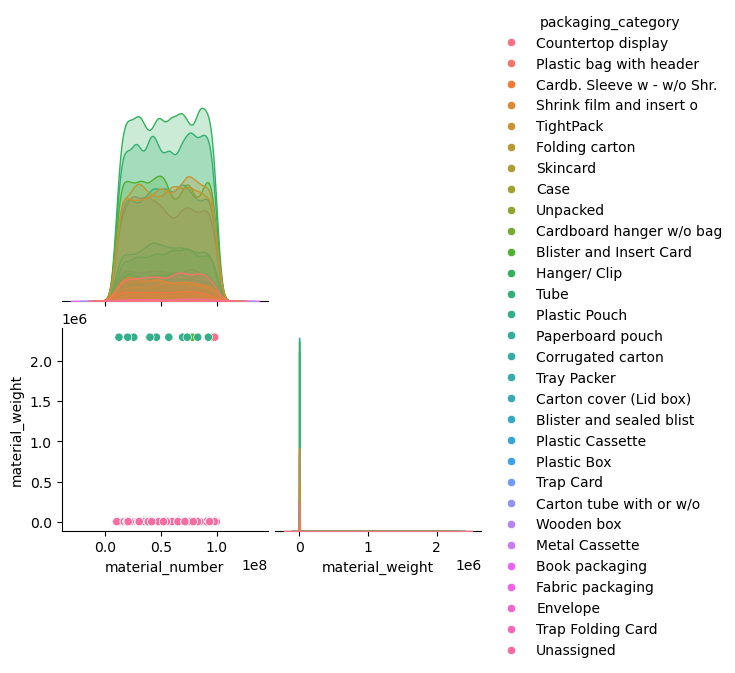

In [ ]:
num_features = df_full.select_dtypes(include=np.number).columns

sns.pairplot(
    data=df_full,
    # kind='scatter',
    corner=True,
    hue="packaging_category",
    # vars=num_features
)

<Figure size 1000x500 with 0 Axes>

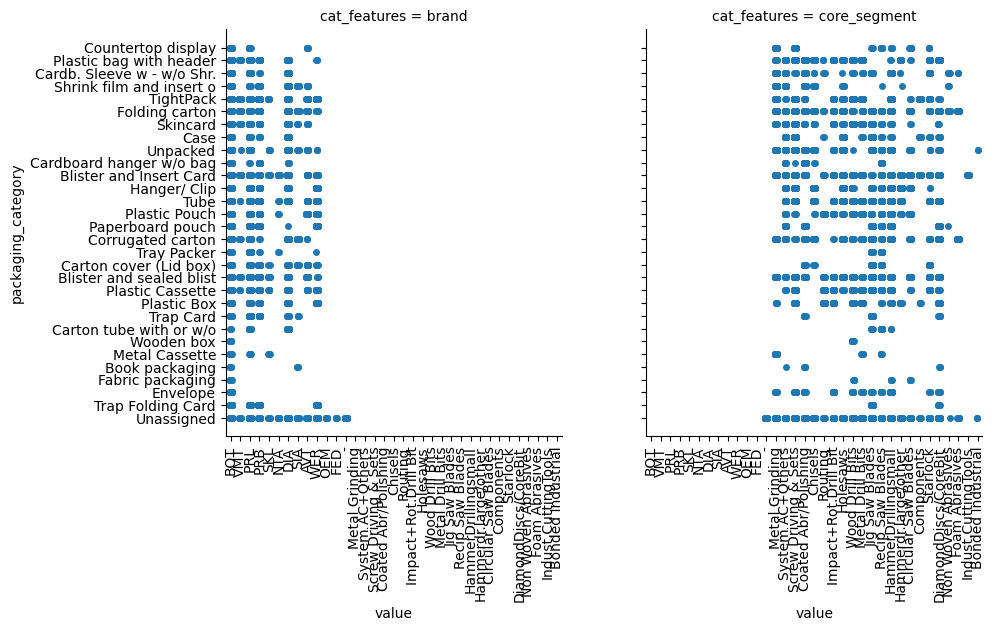

In [ ]:
# transform from wide to long, then plot using the column 'features' to facet
# df_cat = df.select_dtypes(include=['object']).melt(id_vars=['packaging_category'], var_name='cat_features')
df_cat = (
    df_full[["brand", "core_segment", "packaging_category"]]
    .select_dtypes(include=["object"])
    .melt(id_vars=["packaging_category"], var_name="cat_features")
)

plt.figure(figsize=(10, 5))
cat_chart = sns.catplot(
    data=df_cat,
    x="value",
    y="packaging_category",
    col="cat_features",
)
cat_chart.set_xticklabels(rotation=90)

# Outliers

([0, 1], [Text(0, 0, 'material_number'), Text(1, 0, 'material_weight')])

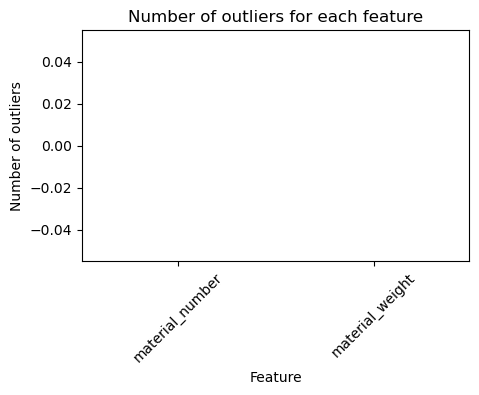

In [ ]:
# Outlier detection for numeric features: threshold_multiplier=1.5

# create np.array for number of outliers for each variable
num_outliers_per_feature = []
# iterate over features in dataframe
for idx, col in enumerate(df_full.select_dtypes(include=np.number).columns):
    tukey_indices, tukey_values = eda_utils.find_outliers_tukey(
        df_full[col], threshold_multiplier=1.5
    )
    num_outliers_per_feature.append(len(tukey_indices))

# plotdistribution of all sensors
plt.figure(figsize=(5, 3))  # absolut for the whole figure
# x_labels for plot
x_labels = df_full.select_dtypes(include=np.number).columns.tolist()
# x_labels = np.arange(1, len(df_numeric_feat.columns.tolist())+1)
plt.bar(x_labels, num_outliers_per_feature)
plt.title("Number of outliers for each feature")
plt.ylabel("Number of outliers")
plt.xlabel("Feature")
plt.xticks(rotation=45)